## Logistic Regression
background: adminstrator of a university determine each applicant's chance of admission based on their results on two exams

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


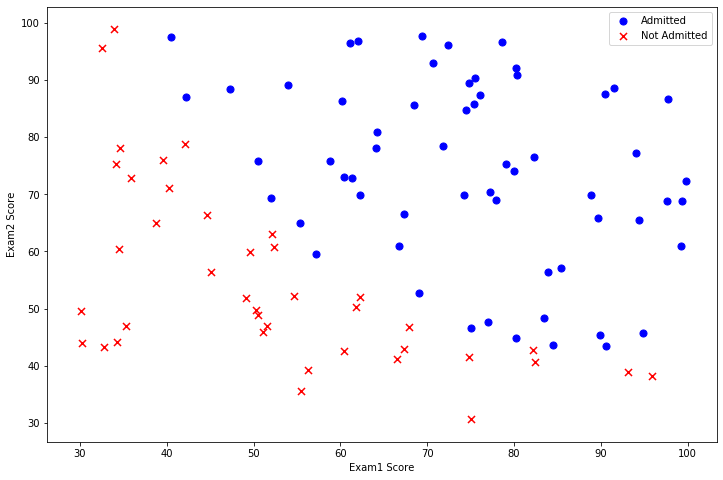

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## Logistic Function
![](img/sigmoid.png)

In [5]:
def logistic(z):
    return 1/(1 + np.exp(-z))

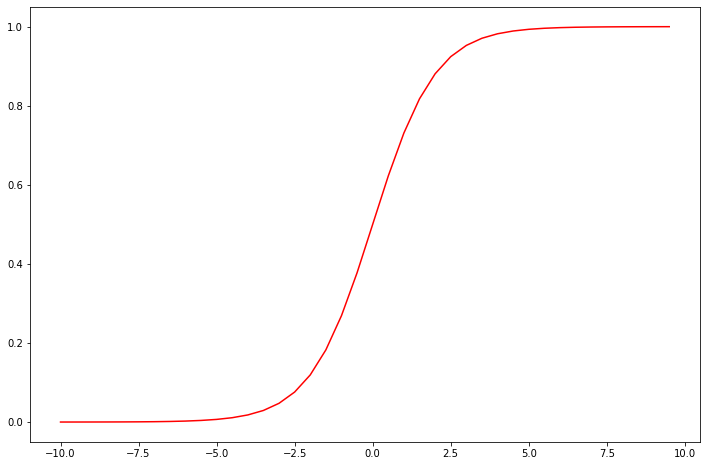

In [6]:
nums = np.arange(-10, 10, step=0.5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, logistic(nums), 'r')
plt.show()

## Cost Function
![](img/cost.png)

In [7]:
def cost(theta, X, Y):
    first = Y * np.log(logistic(X@theta))
    second = (1 - Y) * np.log(1 - logistic(X@theta))
    return -1 * np.mean(first + second)

In [8]:
# add ones column
data.insert(0, 'Ones', 1)

In [9]:
# preprocess data
X = data.iloc[:, : -1].values
Y = data.iloc[:, -1].values
theta = np.array([0,0,0])

In [10]:
cost(theta, X, Y)

0.6931471805599453

## Gradient Descent
![](img/gradient.png)

In [11]:
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (logistic(X@theta) - Y))

In [12]:
gradient(theta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

 ## Optimization Algorithm 

Use Scipy.optimize.fmin_tnc to optimize thetas

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [14]:
type(result)

tuple

In [15]:
cost(result[0], X, Y)

0.20349770158947453

In [16]:
theta.shape

(3,)

Use Scipy.optimize.minimize to optimize thetas

In [17]:
res = opt.minimize(fun=cost, x0=np.array(theta), args=(X, np.array(Y)), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770159041028
     jac: array([-1.36170577e-07, -2.02377035e-05,  6.14692479e-06])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 243
  status: 0
 success: True
       x: array([-25.16141434,   0.20623236,   0.20147225])

In [18]:
cost(res.x, X, Y)

0.20349770159041028

## Prediction
1 if cost function >= 0.5, else 0.

In [19]:
def predict(theta, X):
    probability = logistic(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability] # list not array, do not have shape property

In [20]:
predictions = predict(result[0], X)
correct = [1 if a^b == 0 else 0 for (a,b) in zip(predictions, Y)] # ^ means XOR
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 89%


In [21]:
# support标签中出现的次数
# precision查准率，recall召回率，f1-score调和平均数
from sklearn.metrics import classification_report
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## Decision Boundary
![](img/decision_boundary.png)

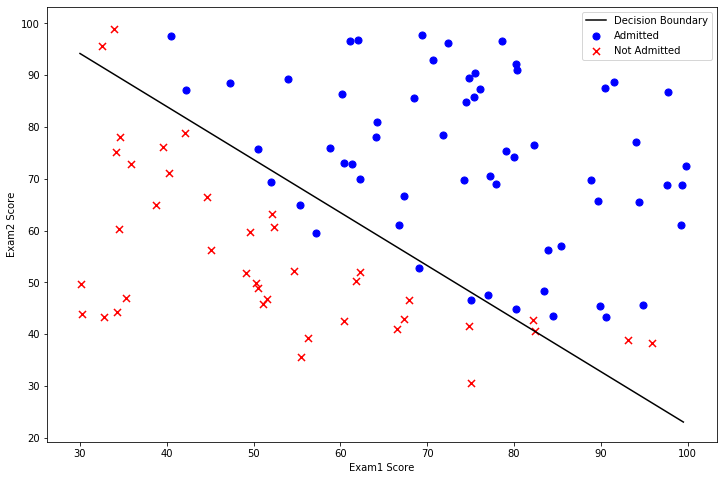

In [22]:
coef = -res.x / res.x[2]
x = np.arange(30, 100, 0.5)
y = coef[0] + coef[1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')#understand this
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x, y, label='Decision Boundary', c='black')#and this
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()